<a id='top'></a>

# CSCI 3022: Intro to Data Science - Fall 2019 Practicum 2
***

This practicum is due on Canvas by **11:59 PM on Wednesday December 11**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  

**Here are the rules:** 

1. All work, code and analysis, must be your own. 
1. You may use your course notes, posted lecture slides, textbooks, in-class notebooks, and homework solutions as resources.  You may also search online for answers to general knowledge questions like the form of a probability distribution function or how to perform a particular operation in Python/Pandas. 
1. This is meant to be like a coding portion of your midterm exam. So, the instructional team will be much less helpful than we typically are with homework. For example, we will not check answers, help debug your code, and so on.
1. If something is left open-ended, it is because we want to see how you approach the kinds of problems you will encounter in the wild, where it will not always be clear what sort of tests/methods should be applied. Feel free to ask clarifying questions though.
2. You may **NOT** post to message boards or other online resources asking for help.
3. You may **NOT** copy-paste solutions *from anywhere*.
4. You may **NOT** collaborate with classmates or anyone else.
5. In short, **your work must be your own**. It really is that simple.

Violation of the above rules will result in an immediate academic sanction (*at the very least*, you will receive a 0 on this practicum or an F in the course, depending on severity), and a trip to the Honor Code Council.

**By submitting this assignment, you agree to abide by the rules given above.**

***

**Name**:  

***


**NOTES**: 

- You may not use late days on the practicums nor can you drop your practicum grades. 
- If you have a question for us, post it as a **PRIVATE** message on Piazza.  If we decide that the question is appropriate for the entire class, then we will add it to a Practicum clarifications thread. 
- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Canvas.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---
**Shortcuts:**  [Problem 1](#p1) | [Problem 2](#p2) | [Bottom](#bot)

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from calendar import month_name, different_locale
from scipy import stats
import statsmodels.api as sm
import seaborn
from scipy.special import binom

<br>

---
<a id='p1'></a>
[Back to top](#top)

### [40 points] Problem 1:  Amazon Forest Fires

A non-profit orgranization is trying to protect the Amazon rain forest and has recruited you as their head data scientist. For your first task, they've given you a dataset with the number of fires in each state in the Amazon region during each month between 1998 and 2017. They would like to have a 95% confidence interval for the true median number of forest fires that occur in each state on a yearly basis. 

In [2]:
#Starter Code
df = pd.read_csv('amazon.csv', thousands='.', decimal ='/', engine='python')
df.info()
# I just wanted to see what the stuff looked like so classic df.head()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
year      6453 non-null object
state     6452 non-null object
month     6454 non-null object
number    6448 non-null float64
date      6450 non-null object
dtypes: float64(1), object(4)
memory usage: 252.2+ KB


,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


**Part A:**  This dataset isn't paticularly useful in it's current state, so we'll need to clean it up a bit. Some data scientists say that most of their job is to wrangle data, so this will give you a taste of cleaning a real world data set. Perform the following tasks:
1. Drop the 'date' column. The only information this column holds is the year, which we already have in another column. 
2. Drop any rows with null values in any of the remaining columns
3. Print all the unique values of the 'month' column. You'll notice that one is encoded with a differant character encoding then the format that pandas is using.
3. Convert the Portugese month names to English month names. We've included the 'month_name' and the 'different_encoding' modules of the python calendar library in the top cell above, if you would like to use them. There are many ways to accomplish this task, and these modules are not required, but may make things easier. As part of this step, you should make sure that the Portugese month with the encoding problem is translated to the correct English month. 
4. Check the number column for any values that seem impossible. Drop any negative or fractional values, or any values over 50,000. 50,000 is large enough that no Brazilian state would ever have that many forest fires in one month, so we should get rid of anything above 50000. 
5. Since you're new on the job, some of your co-workers may have played a prank on you... Print out all the unique values of the 'year' column and drop any rows with values that don't make sense.
6. Find the total number of rows remaining after you've done all of the above and write it out in a markdown cell. if you have correctly performed all of the tasks above, your dataframe should now have 6438 rows.

**NOTE:** Since some of these tasks are not totally trivial, you may use any resources other than your classmates on this part of this problem. This means you may consult google, stack overflow, the python/pandas documentation, some random book on pandas you might have, etc... But you may not consult your classmates for help. ***CITE ALL RESOURCES USED IN A CODE COMMENT. A URL OR A BOOK TITLE IS SUFFICIENT. ANY CODE OBIVOUSLY COPIED FROM OUTSIDE SOURCES WITH OUT A CITATION WILL EARN YOU NO CREDIT ON THIS PROBLEM. YOU ARE ALLOWED TO USE THESE RESOURCES ONLY ON THIS PART OF THIS PROBLEM!***

In [3]:
#Your code here
# I referenced the pandas documentation at https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
# and the old notebooks and homeworks
# 1. dropping the date column
if 'date' in df.columns:
    df = df.drop(columns='date')
    
# 2. drop any rows with null
df = df.dropna()

# 3. print all unique values of the month column
print('-----------------')
array = set(df['month'])
print(array)

# 4. convert portugese months to english months
df.loc[df['month'] == 'Janeiro', 'month'] = 'January'
df.loc[df['month'] == 'Fevereiro', 'month'] = 'February'
df.loc[df['month'] == 'Marï¿½o', 'month'] = 'March'
df.loc[df['month'] == 'Abril', 'month'] = 'April'
df.loc[df['month'] == 'Maio', 'month'] = 'May'
df.loc[df['month'] == 'Junho', 'month'] = 'June'
df.loc[df['month'] == 'Julho', 'month'] = 'July'
df.loc[df['month'] == 'Agosto', 'month'] = 'August'
df.loc[df['month'] == 'Setembro', 'month'] = 'September'
df.loc[df['month'] == 'Outubro', 'month'] = 'October'
df.loc[df['month'] == 'Novembro', 'month'] = 'November'
df.loc[df['month'] == 'Dezembro', 'month'] = 'December'

print('-----------------')
array = set(df['month'])
print(array)
print('-----------------')
# 5. check number column for any impossible values. negative, fractions, greater than 50000
df.loc[df['number'] < 0, 'number'] = np.nan
df.loc[df['number'] > 50000, 'number'] = np.nan
df.loc[ (round(df['number']) != df['number']), 'number'] = np.nan
df = df.dropna()

# 6. print all unique year values and drop weird ones
years = set(df['year'])
print(years)
print('-----------------')
df.loc[df['year'] == '-40', 'year'] = np.nan
df.loc[df['year'] == 'our new data scientist won\'t notice this', 'year'] = np.nan
df.loc[df['year'] == '10bc', 'year'] = np.nan
df.loc[df['year'] == '1000bc', 'year'] = np.nan
df = df.dropna()
years = set(df['year'])
print(years)
print('-----------------')

# 7. total number of rows, write it in a markdown, should be 6438
df.info()


-----------------
{'Dezembro', 'Maio', 'Outubro', 'Abril', 'Agosto', 'Fevereiro', 'Julho', 'Novembro', 'Janeiro', 'Marï¿½o', 'Junho', 'Setembro'}
-----------------
{'March', 'May', 'August', 'April', 'February', 'July', 'October', 'November', 'December', 'September', 'January', 'June'}
-----------------
{'2006', '1000bc', '2000', "our new data scientist won't notice this", '2012', '2016', '2007', '2001', '2014', '2003', '-40', '1999', '2011', '2017', '2010', '2009', '2002', '2004', '2005', '2008', '2013', '10bc', '2015', '1998'}
-----------------
{'2006', '2000', '2012', '2016', '2007', '2001', '2014', '2003', '1999', '2011', '2017', '2010', '2009', '2002', '2004', '2005', '2008', '2013', '2015', '1998'}
-----------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6438 entries, 0 to 6453
Data columns (total 4 columns):
year      6438 non-null object
state     6438 non-null object
month     6438 non-null object
number    6438 non-null float64
dtypes: float64(1), object(3)
memory 

The number of rows after my edits are 6438. 

**Part B:** Extract the median number of forest fires per month, yearly, by state. Store these median values in the given python dictionary.

For Example:

If one year of one state had the following numbers of fires:

Jan: 1

Feb: 2

Mar: 3

Apr: 4

May: 5

Jun: 6

Jul: 7

Aug: 8

Sep: 9

Oct: 10

Nov: 11

Dec: 12

Then the median number of forest fires per month would be 6.5 (the average of the two middle elements since this has an even length)

If the state of "test" had 5 years of recorded data, with the following median forest fire values: \[1, 2, 7, 9, 3\],  then python dictionary should look like: 

\{

    "test": [1, 2, 7, 9, 3]
    
\}

Below we've given you one of the states values in a test, so you can ensure you are calculating the medians correctly.

In [4]:
#GIVEN DICTIONARY CODE
median_num_fires_monthly_yearly = {
    'Acre': None,
    'Alagoas': None,
    'Amapa': None,
    'Amazonas': None,
    'Bahia': None,
    'Ceara': None,
    'Distrito Federal': None,
    'Espirito Santo': None,
    'Goias': None,
    'Maranhao': None,
    'Mato Grosso': None,
    'Minas Gerais': None,
    'Para': None,
    'Paraiba': None,
    'Pernambuco': None,
    'Piau': None,
    'Rio': None,
    'Rondonia': None,
    'Roraima': None,
    'Santa Catarina': None,
    'Sao Paulo': None,
    'Sergipe': None,
    'Tocantins': None  
}

In [5]:
# Your code here
# first get all of the provinces and put them into a list
provinces = set(df['state'])
provinces = list(provinces)
# sort the provinces
provinces = np.sort(provinces)
# get a set of the years put them in a list and sort them
years = set(df['year'])
years = list(years)
years = np.sort(years)
# All the months in the correct order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# for every province
for province in provinces:
    # for every year in that province
    for year in years:
        # stores the medians of each month
        medianmonths = []
        # for every month in that year
        for month in months:
            # make a dataframe of only the province
            dummy = df.loc[df['state'] == province].copy()
            # make a dataframe out of that of only this year
            dummy = dummy.loc[dummy['year'] == year]
            # and finally get only this month
            dummy = dummy.loc[dummy['month'] == month]
            # 2017 december doesnt have any data so skip it, or if we get an nan median dont append it
            if not ((year == '2017' and month == 'December') or np.isnan(np.median(dummy['number']))):
                # calculate the median for the month
                medianmonths.append(np.median(dummy['number']))
        # so if the median_num_fires_monthly_yearly is empty then we cant append so make it into a new list
        # or if it is nan dont append it
        if (median_num_fires_monthly_yearly[province] == None and (not np.isnan(np.median(medianmonths)))):
            # get the median of the months and put it into the dictionary
            median_num_fires_monthly_yearly[province] = [np.median(medianmonths)]
        # else then we can append since there is a list there to append to
        # but dont append if the median of the months is nan
        elif not np.isnan(np.median(medianmonths)):
            # get our list of medians for the province
            median = median_num_fires_monthly_yearly[province]
            # append our new median to that list
            median.append(np.median(medianmonths))
            # set the dictionary to our new list that includes the new median
            median_num_fires_monthly_yearly[province] = median
# print out the dictionary
print(median_num_fires_monthly_yearly)

C:\Users\777ak\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\777ak\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


{'Acre': [1.5, 0.0, 1.0, 0.5, 1.0, 8.0, 7.0, 13.0, 6.0, 4.5, 0.0, 2.5, 6.0, 7.0, 5.0, 13.5, 12.0, 24.0, 33.5, 45.0], 'Alagoas': [0.0, 4.0, 7.5, 3.0, 13.0, 12.5, 6.5, 11.5, 8.0, 4.5, 18.0, 21.5, 10.5, 20.0, 24.5, 14.5, 12.5, 36.0, 13.5, 7.0], 'Amapa': [0.0, 1.5, 1.0, 0.5, 5.0, 8.0, 7.0, 3.0, 4.0, 0.0, 2.0, 4.0, 2.0, 4.0, 13.0, 2.5, 7.0, 9.5, 12.0, 3.0], 'Amazonas': [4.0, 9.0, 55.5, 8.5, 30.5, 152.5, 107.5, 61.0, 21.5, 63.5, 24.0, 57.5, 119.5, 87.0, 62.5, 138.0, 138.0, 231.5, 433.0, 119.0], 'Bahia': [52.0, 95.0, 92.5, 129.5, 376.5, 407.5, 299.5, 240.0, 227.0, 321.5, 253.0, 278.5, 261.5, 209.5, 400.0, 259.5, 233.5, 281.0, 376.5, 174.0], 'Ceara': [38.5, 65.0, 17.0, 113.5, 54.0, 61.5, 22.5, 38.0, 36.5, 96.5, 22.0, 17.0, 132.5, 25.0, 161.5, 40.5, 81.0, 76.0, 112.0, 26.0], 'Distrito Federal': [0.0, 1.5, 0.5, 0.5, 1.0, 0.5, 3.5, 2.0, 0.5, 2.5, 3.0, 2.0, 7.0, 1.5, 2.0, 2.0, 4.0, 1.5, 7.0, 6.0], 'Espirito Santo': [4.5, 9.5, 5.0, 6.5, 10.5, 24.5, 4.5, 5.0, 10.5, 11.0, 6.5, 12.5, 8.5, 6.5, 22.5, 1

In [6]:
#Given Test
assert median_num_fires_monthly_yearly['Acre'] == \
[1.5, 0.0, 1.0, 0.5, 1.0, 8.0, 7.0, 13.0, 6.0, 4.5, 0.0, 2.5, 6.0, 7.0, 5.0, 13.5, 12.0, 24.0, 33.5, 45.0] \
, "something is wrong here"

In [7]:
#DONT CHANGE THIS. WE USE IT TO MAKE THE OUTPUT LEGIBLE FOR GRADING
import pprint
pp = pprint.PrettyPrinter(indent=1)
pp.pprint(median_num_fires_monthly_yearly)

{'Acre': [1.5,
          0.0,
          1.0,
          0.5,
          1.0,
          8.0,
          7.0,
          13.0,
          6.0,
          4.5,
          0.0,
          2.5,
          6.0,
          7.0,
          5.0,
          13.5,
          12.0,
          24.0,
          33.5,
          45.0],
 'Alagoas': [0.0,
             4.0,
             7.5,
             3.0,
             13.0,
             12.5,
             6.5,
             11.5,
             8.0,
             4.5,
             18.0,
             21.5,
             10.5,
             20.0,
             24.5,
             14.5,
             12.5,
             36.0,
             13.5,
             7.0],
 'Amapa': [0.0,
           1.5,
           1.0,
           0.5,
           5.0,
           8.0,
           7.0,
           3.0,
           4.0,
           0.0,
           2.0,
           4.0,
           2.0,
           4.0,
           13.0,
           2.5,
           7.0,
           9.5,
           12.0,
           3.0

**Part C:** Since we cannot rely on the central limit thereom for the median, we'll bootstrap some samples. Bootstrap 1000 samples for each state. Each bootstrapped sample should have 50 values drawn from the original sample.

Find the median of each bootstrapped sample, and add it to a list. Save the list of median values for the states of **Sao Paulo** and **Goias**. We'll use them later to plot in part D. Then determine the 95% confidence interval of the true median from each list of bootstrapped medians for each state. Add a list of the low and high values of the confidence interval to the given python dictionary below. To help you check your work, the confidence interval of the state of Acre should be from roughly 4 to 7. Your values will change though, because each bootstrapped sample is picked randomly from the original.

For Example:

If the 95% confidence interval on the median is from 6 to 22 for the state of "test", then the dictionary would look like:

{

    "test": [6, 22]
    
}

In [8]:
#GIVEN CODE
median_num_fires_bootstrap = {
    'Acre': None,
    'Alagoas': None,
    'Amapa': None,
    'Amazonas': None,
    'Bahia': None,
    'Ceara': None,
    'Distrito Federal': None,
    'Espirito Santo': None,
    'Goias': None,
    'Maranhao': None,
    'Mato Grosso': None,
    'Minas Gerais': None,
    'Para': None,
    'Paraiba': None,
    'Pernambuco': None,
    'Piau': None,
    'Rio': None,
    'Rondonia': None,
    'Roraima': None,
    'Santa Catarina': None,
    'Sao Paulo': None,
    'Sergipe': None,
    'Tocantins': None  
}

In [9]:
#Your code here.
# for every province
for province in provinces:
    # draw the samples 1000 times
    for i in range(1000):
        # if our dictionary holds a none then we cant append and there is
        # nothing there so set the dictionary to a new list that is the
        # median of our 50 samples
        if median_num_fires_bootstrap[province] == None:
            median_num_fires_bootstrap[province] = [np.median(np.random.choice(median_num_fires_monthly_yearly[province], size=50, replace=True))]
        # else add our median of 50 samples to our list
        else:
            median_num_fires_bootstrap[province].append(np.median(np.random.choice(median_num_fires_monthly_yearly[province], size=50, replace=True)))

# these will store the information for the provinces
saopaulo = []
goias = []

# for every province
for province in provinces:
    # if our province is one of the ones we need to store, then store the data
    if province == 'Sao Paulo':
        saopaulo = median_num_fires_bootstrap[province]
    if province == 'Goias':
        goias = median_num_fires_bootstrap[province]
    # change the dictionary entry to a confidence interval for all the points in the dictionary
    # in that province
    median_num_fires_bootstrap[province] = [np.percentile(median_num_fires_bootstrap[province], 2.5), np.percentile(median_num_fires_bootstrap[province], 97.5)]

# print the dictionary
print(median_num_fires_bootstrap)

{'Acre': [4.5, 7.0], 'Alagoas': [8.0, 13.0], 'Amapa': [2.5, 4.0], 'Amazonas': [57.5, 107.5], 'Bahia': [233.5, 278.5], 'Ceara': [38.0, 65.0], 'Distrito Federal': [1.5, 2.0], 'Espirito Santo': [7.987500000000001, 11.0], 'Goias': [98.0, 166.5], 'Maranhao': [620.5, 813.0], 'Mato Grosso': [514.75, 595.5], 'Minas Gerais': [136.0, 167.0], 'Para': [466.0, 679.0], 'Paraiba': [53.0, 75.25], 'Pernambuco': [21.25, 30.5], 'Piau': [193.0, 308.0], 'Rio': [24.0, 35.5], 'Rondonia': [41.0, 116.0], 'Roraima': [44.5, 72.5], 'Santa Catarina': [29.0, 43.0], 'Sao Paulo': [111.5, 146.5], 'Sergipe': [1.5, 5.0], 'Tocantins': [171.0, 337.0]}


In [10]:
#DONT CHANGE THIS. WE USE IT TO MAKE THE OUTPUT LEGIBLE FOR GRADING
import pprint
pp = pprint.PrettyPrinter(indent=1)
pp.pprint(median_num_fires_bootstrap)

{'Acre': [4.5, 7.0],
 'Alagoas': [8.0, 13.0],
 'Amapa': [2.5, 4.0],
 'Amazonas': [57.5, 107.5],
 'Bahia': [233.5, 278.5],
 'Ceara': [38.0, 65.0],
 'Distrito Federal': [1.5, 2.0],
 'Espirito Santo': [7.987500000000001, 11.0],
 'Goias': [98.0, 166.5],
 'Maranhao': [620.5, 813.0],
 'Mato Grosso': [514.75, 595.5],
 'Minas Gerais': [136.0, 167.0],
 'Para': [466.0, 679.0],
 'Paraiba': [53.0, 75.25],
 'Pernambuco': [21.25, 30.5],
 'Piau': [193.0, 308.0],
 'Rio': [24.0, 35.5],
 'Rondonia': [41.0, 116.0],
 'Roraima': [44.5, 72.5],
 'Santa Catarina': [29.0, 43.0],
 'Sao Paulo': [111.5, 146.5],
 'Sergipe': [1.5, 5.0],
 'Tocantins': [171.0, 337.0]}


**Part D:** Plot a histogram of the frequency of different median values for the two states **Sao Paulo** and **Goias**. Overlay these histograms on the same plot. Include axis labels, a title, a legend, etc. Choose two colors that work well together and provide enough contrast (e.g. No one can see gold overlayed with yellow), and use reasonable values of the **alpha** parameter so you can see both histograms. Plot two vertical lines that represent the outer bounds of the 95% confidence interval on the true median for each state, in the same color as the state. Does the data for the median look normally distributed? Why or why not? Does this validate our decision to not use the central limit theorem and instead bootstrap our median samples? Explain in a markdown cell below.

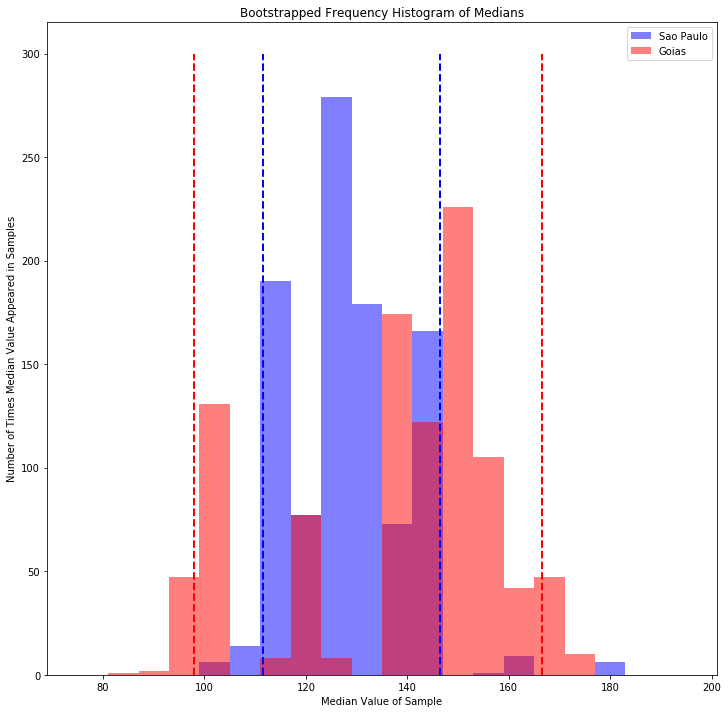

In [11]:
#Your code here.
# make the figure and its size
fig, ax = plt.subplots(figsize=(12,12))
# create bins for the histogram
mybins = range(75, 200, 6)
# plot the frequency histogram for our data
plt.hist(saopaulo, bins=mybins, fc='blue', alpha=0.5, label='Sao Paulo')
plt.hist(goias, bins=mybins, fc='red', alpha=0.5, label='Goias')
# make vertical lines for the confidence intervals
plt.plot([median_num_fires_bootstrap['Sao Paulo'][0], median_num_fires_bootstrap['Sao Paulo'][0]], [0,300], color='blue', ls='--', lw=2)
plt.plot([median_num_fires_bootstrap['Sao Paulo'][1], median_num_fires_bootstrap['Sao Paulo'][1]], [0,300], color='blue', ls='--', lw=2)
plt.plot([median_num_fires_bootstrap['Goias'][0], median_num_fires_bootstrap['Goias'][0]], [0,300], color='red', ls='--', lw=2)
plt.plot([median_num_fires_bootstrap['Goias'][1], median_num_fires_bootstrap['Goias'][1]], [0,300], color='red', ls='--', lw=2)
# plot the legend
ax.legend()
# label the titles
ax.set_ylabel('Number of Times Median Value Appeared in Samples')
ax.set_xlabel('Median Value of Sample')
ax.set_title('Bootstrapped Frequency Histogram of Medians')
# show the plots
plt.show()

Goias definitely does not look normally distributed. There is a large gap of missing medians in the middle of it. And the right clump of data doesn't look like a normal curve. Also Sao Paulo doesn't look normal because the median drop extremely quickly on both sides, but on one side it rises back up and dips again. It is better that we used bootstrapping instead of central limit theorem because the central limit theorem requires that our data be normally distributed, and our data deffinetly doesn't look normally distributed. 

<br>

---
<a id='p2'></a>
[Back to top](#top)

### [40 points] Problem 2:  Sharknado Prediction

Governor Hickenlooper has charged you with the task of assessing the factors associated with sharknado risk in Colorado. As everyone knows, sharknadoes are a leading cause of sharknado-related illness, and you are a world-renowned data/shark scientist.

You decide to use multiple linear regression to understand and predict what factors lead to increased sharknado hazard. Your lead scientist, aptly named Fin, has collected lots of relevant data at a local sharknado hotspot, the Boulder Reservoir[\*](#footnote). The data cover a variety of sharknado-related environmental and other conditions, and you'll find this data in the file `sharknadoes.csv`. 

**Response**: 

- $\texttt{sharknado hazard}$: the hazard of a sharknado, where 1 is very unlikely and 100 is highly likely

**Features**: 

- $\texttt{taunts}$: the number of times over the past year that someone has taunted a shark
- $\texttt{clouds}$: what percentage of the sky was covered by clouds (fraction, 0-1)
- $\texttt{precipitation}$: amount of precipitation in the past 72 hours (inches)
- $\texttt{earthquake}$: the intensity of the most recent earthquake measured in the continental United States
- $\texttt{shark attacks}$: the number of shark attacks within 72 hours prior to the observation
- $\texttt{ice cream sold}$: the number of units of ice cream sold at the beach concession stand 
- $\texttt{misery index}$: an economic indicator for how miserable the average United States citizen is, based on the unemployment rate and the inflation rate. More [here](https://www.stuffyoushouldknow.com/podcasts/whats-the-misery-index.htm) and [here](https://en.wikipedia.org/wiki/Misery_index_(economics)). Higher values correspond to more miserable citizens.
- $\texttt{temperature}$: the outside temperature, measured in degrees Fahrenheit
- $\texttt{humidity}$: relative humidity (percent, 0-100)
- $\texttt{pizzas sold}$: the number of pizzas sold at the beach concession stand in the past year
- $\texttt{pressure}$: local air pressure (millibar) 
- $\texttt{octopuses}$: the number of octupuses in the vicinity on the day of the observation
- $\texttt{Zach's shoe size}$: the size of the shoes Zach was wearing when the observation was made
- $\texttt{Rachel's shoe size}$: the size of the shoes Rachel was wearing when the observation was made

**Part A**: Read the data from `sharknadoes.csv` into a Pandas DataFrame.  Note that since we will be doing a multiple linear regression we will need all of the features. To make sure the data is "clean", drop any row in the DataFrame that is missing data. 

In [12]:
#Your code here.
sharkdf = pd.read_csv('sharknadoes.csv')
sharkdf = sharkdf.dropna()

**Part B**: Perform the appropriate statistical test at the $\alpha = 0.025$ significance level to determine if _at least one_ of the features is related to the the response $y$.  Clearly describe your methodology and show all computations in Python. 

4.4773034275254284e-24


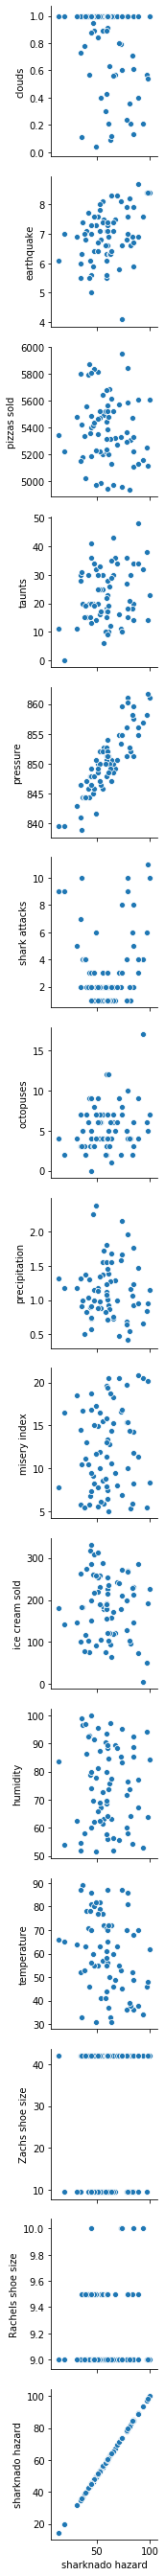

In [13]:
#Your code here.
# i went and found the best column for part B using pairplot
features = sharkdf.columns
seaborn.pairplot(sharkdf, x_vars='sharknado hazard', y_vars=sharkdf.columns)
# pressure looks really promising so I'm going to do a single
# linear regression and get the pvalue from that to see if it is 
# statistically signficant. If the pvalue is less than 0.025 then all good
bhat, ahat, rvalue, pvalue, stderror = stats.linregress(sharkdf['pressure'], sharkdf['sharknado hazard'])
print(pvalue)

We will do a hypothesis test based on partial F-test p-value to see whether there is a significant relationship between y and one of the features. First I used pairplot to find the most likely feature to be related based on the clustering of data and if it looked like a line. The null hypothesis will be that there is no useful relationship between sharknado hazard and pressure.
In python, first we will make a linear regression of sharknado hazard and pressure. Then we will do $H_0 : \beta = 0, H_1 : \beta \ne 0$. We will check the p-value returned by the linregress model. If the p-value is less than our 0.025 significance level, then at least one of the features is related since pressure is related. The p-value was 4.5 e -24 which is less than 0.025 so we can conclude that pressure is significant which in turn means that at least one feature is significant.

**Part C**: Write a function `backward_select(df, resp_str, maxsse)` that takes in the DataFrame (`df`), the name of the column corresponding to the response (`resp_str`), and the maximum desired sum of squared errors (`maxsse`), and returns a list of feature names corresponding to the most important features via backward selection.  Use your code to determine the reduced MLR model with the minimal number of features such that the SSE of the reduced model is less than 570. At each stage in backward selection you should remove the feature that has the highest p-value associated with the hypothesis test for the given slope coefficient $\beta_k \neq 0$.

Your code should clearly indicate which feature was removed in each stage, and the SSE associated with the model fit before the feature's removal. _Specifically, please write your code to print the name of the feature that is going to be removed and the SSE before its removal_. Afterward, be sure to report all of the retained features and the SSE of the reduced model.

**Note**: The point of this exercise is to see if you can implement **backward_select** yourself.  You may of course use canned routines like statmodels OLS, but you may not call any Python method that explicitly performs backward selection.

In [14]:
def backward_select(df, resp_str, maxsse):
    #Your code here.
    # get a list of features from the dataframe
    features = list(df.columns)
    # remove our response from the features
    features.remove(resp_str)
    # honestly, I got this from the notebooks and only half understand
    # get the x values from the dataframe and put them into the statsmodel constants
    x = df[features]
    x = sm.add_constant(x)
    # get our actual y values
    y = df[resp_str]
    # do our linear regression using stats model
    model = sm.OLS(y, x)
    # put our results into a fit
    results = model.fit()
    # get the yhats
    yhat = results.predict()
    # calculate the SSE
    sse = np.sum((y-yhat)**2)
    # print the SSE
    print(sse)
    
    #print(dir(results))
    #print(results.pvalues)
    #print(results.summary())
    
    # this is a boolean to determine whether or not to do the while loop
    dowhile = True
    while sse < maxsse and dowhile:
        # print our values at the beginning of the iteration
        print('The sse at beginning of this iteration is', sse)
        # figure out what the largest pvalue is
        maximump = max(results.pvalues)
        # for every feature
        for feature in features:
            # if that features pvalue is our max pvalue
            if results.pvalues[feature] == maximump:
                # put the feature into a temporary variable
                fea = feature
                # remove the feature from our features list
                features.remove(feature)
                # make our model and calculate the SSE, same way as above
                x = df[features]
                x = sm.add_constant(x)
                model = sm.OLS(y, x)
                results = model.fit()
                yhat = results.predict()
                newsse = np.sum((y - yhat)**2)
                # if our newSSE is still less than our max
                if newsse <= maxsse:
                    # officially remove the feature and change our sse, 
                    # and do the loop again
                    print('Removed', feature, 'new sse is: ', newsse)
                    sse = newsse
                else:
                    # dont do the loop again
                    dowhile = False
                    # put our feature back into the list of features
                    features.append(fea)
                    # print the list of features and the sse
                    print('List of features kept is', features)
                    print('Final SSE with those features is', sse)
                    # return features
                    return features
                
# call our method for a maxsse of 570, with our response being sharknado hazard
# and store result in a list
selected = backward_select(sharkdf, 'sharknado hazard', 570)

C:\Users\777ak\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


532.9436707404443
The sse at beginning of this iteration is 532.9436707404443
Removed Rachels shoe size new sse is:  533.4003410558878
The sse at beginning of this iteration is 533.4003410558878
Removed misery index new sse is:  534.6875698945796
The sse at beginning of this iteration is 534.6875698945796
Removed octopuses new sse is:  536.506991125646
The sse at beginning of this iteration is 536.506991125646
Removed clouds new sse is:  539.496561635768
The sse at beginning of this iteration is 539.496561635768
Removed pizzas sold new sse is:  543.3572004721009
The sse at beginning of this iteration is 543.3572004721009
Removed humidity new sse is:  547.4141982866491
The sse at beginning of this iteration is 547.4141982866491
Removed shark attacks new sse is:  552.1548653819069
The sse at beginning of this iteration is 552.1548653819069
Removed Zachs shoe size new sse is:  564.1068895239192
The sse at beginning of this iteration is 564.1068895239192
List of features kept is ['earthqua

The retained feauters are earthquake, taunts, pressure, precipitation, temperature, ice cream sold, with an SSE of 564.107.

**Part D**: Write down the final multiple linear regression model, including estimated parameters, obtained by your backward selection process. 

In [15]:
#Your code here.
# this is going to make the model with our kept features
x = sharkdf[selected]
x = sm.add_constant(x)
y = sharkdf['sharknado hazard']
model = sm.OLS(y, x)
results = model.fit()
# print the betas for our model
print(results.params)

const            -2542.039198
earthquake           2.401187
taunts               0.318776
pressure             3.061834
precipitation        1.255909
temperature         -0.468043
ice cream sold       0.009931
dtype: float64


Final model is: <br>
$\hat y = -2542.04 + 2.40*earthquake + 0.32*taunts + 3.06*pressure + 1.26*precipitation + -0.47*temperature + 0.01*ice\_cream\_sold$

**Part E**: Perform the appropriate statistical test at the $\alpha = 0.025$ significance level to determine whether there is a statistically significant difference between the full model with all features and the reduced model obtained by backward selection in **Part D**. You may use output from your model fit above, but all calculations should be set up in Markdown/MathJax.

Ok, so I'm not sure how to get the sse from the stats summary so I calculated it below. The sse for the full was 532.94, the sse for the reduced model was 564.11. Also printed n which is 72.  Which this I can now do the partial F-test. $H_0$ full model is better, $H_1$ our reduced model is better. If F is greater then $F_{\alpha,p-k,n-p-1}$ then we can reject the null hypothesis and our new model is better.
$$
F = \frac{(SSE_{reduced} - SSE_{full})/(p-k)}{SSE_{full}/(n-p-1)}
$$
$$
F = \frac{(564.11-532.94)/(14-6)}{532.94/(72-14-1)}
$$
$$
F = \frac{3.90}{9.35}
$$
$$
F = 0.4166
$$
$$
F \ge stats.f.ppf(0.025, 14, 72-14-1) 
$$
$$
0.4166 \ge 0.3816
$$
So our new reduced model is the better model. 

In [16]:
features = list(sharkdf.columns)
features.remove('sharknado hazard')
x = sharkdf[features]
x = sm.add_constant(x)
y = sharkdf['sharknado hazard']
print(len(y))
model = sm.OLS(y, x)
results = model.fit()
yhatf = results.predict()
ssef = np.sum((y - yhatf)**2)
print(ssef)
x = sharkdf[selected]
x = sm.add_constant(x)
y = sharkdf['sharknado hazard']
model = sm.OLS(y, x)
results = model.fit()
yhatr = results.predict()
sser = np.sum((y - yhatr)**2)
print(sser)
stats.f.ppf(0.025, 14, 72-14-1)

72
532.9436707404443
564.106889523927


0.38159601049412906

**Part F**: Based on your conclusions in **Part E**, use the _better_ of the two models to predict the sharknado hazard when the following features are observed: 

- $\texttt{taunts}$: 47
- $\texttt{clouds}$: 0.8
- $\texttt{precipitation}$: 1 inch
- $\texttt{earthquake}$: 5
- $\texttt{shark attacks}$: 11
- $\texttt{ice cream sold}$: 120
- $\texttt{misery index}$: 15
- $\texttt{temperature}$: 70 degrees F
- $\texttt{humidity}$: 83
- $\texttt{pizzas sold}$: 5500
- $\texttt{pressure}$: 850 millibar 
- $\texttt{octopuses}$: 6
- $\texttt{Zach's shoe size}$: 9.5
- $\texttt{Rachel's shoe size}$: 9

In [17]:
#Your code here.
# this is going to make the model with our kept features
x = sharkdf[selected]
x = sm.add_constant(x)
y = sharkdf['sharknado hazard']
model = sm.OLS(y, x)
results = model.fit()
params = results.params
#print(params)
# now using our coefficients calculated and multiplying them by the values
# given above to determine our yhat and predict the sharknado hazard
yhat = params['const']
yhat += params['earthquake']*5
yhat += params['taunts']*47
yhat += params['pressure']*850
yhat += params['precipitation']*1
yhat += params['temperature']*70
yhat += params['ice cream sold']*120
print('sharknado hazard =', yhat)

sharknado hazard = 57.19235386125125


The sharknado hazard is 57.19 using the reduced model for the values given.

**Part G:** Consider the model you used in Part E, and consider the fact that you are trying to predict **sharknado hazard**. What is one critical drawback to the MLR model (or any MLR model) for predicting shardnado hazard? What are some modifications that could improve on this issue?

It appears that the sharknado hazard ranges from 1 to 100. An MLR will give us values outside of this. We could fix this by doing transformations in y and x so that values end up only from 1 to 100 like we did with sigmoid. Also, Backward selection and a full MLR model both seem like a bad choice for predicting sharknado hazard. This is due to the fact that we have a lot of data that is obviously irrelevant to sharknado hazard, like Zach's shoe size. Instead we should be using a forward selection model and if it shows significant statistical evidence of both improving the model and being relevant then add it to the model. Considering everything from the start and then removing until we reach a threshold is weird considering we have so many things that seem completely unrelated to the sharknado hazard. 